In [1]:
from typing import TypedDict
from langgraph.graph import StateGraph

In [13]:
class AgentState(TypedDict):
    name: str
    hobby: str
    age: int
    result: str

def intro_node(state: AgentState) -> AgentState:
    state['result'] = f"Hello {state['name']}! I hear you enjoy {state['hobby']}. "
    return state

def math_node(state: AgentState)->AgentState:
    age_squared = state['age'] ** 2
    state['result'] = state['result'] + f"Did you know? The square of your age is {age_squared}."
    return state

def closing_node(state: AgentState)->AgentState:
    state['result']= state['result'] + 'Thanks for chatting with our system today!'
    return state



In [15]:
graph = StateGraph(AgentState)

graph.add_node('introduction', intro_node)
graph.add_node('do_math', math_node)
graph.add_node('closer', closing_node)

graph.add_edge('introduction', 'do_math')
graph.add_edge('do_math','closer')
graph.set_entry_point('introduction')
graph.set_finish_point('closer')

app= graph.compile()

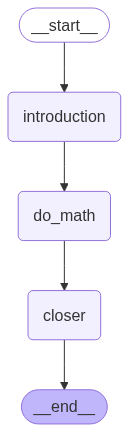

In [10]:
from IPython.display import display, Image
display(Image(app.get_graph().draw_mermaid_png()))

In [16]:
ans = app.invoke({ 'name': "Temitayo", 'hobby': "Football",
    'age': 25})

In [17]:
print(ans['result'])

Hello Temitayo! I hear you enjoy Football. Did you know? The square of your age is 625.Thanks for chatting with our system today!
